### Expand this section to run the code in below subsections individually

#####**Any required Installs and routine Imports**

In [848]:
# 1. Harris Corner detection on two images
# 2. SIFT descriptors on two images
# 3. LINEAR REGRESSION / RANSAC on two images
# 4. Stitch the second image on first using obtained Affine transformation matrix
# 5. Crop the black region of the image and display end image to the user

#routine imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### **Reading two images to be stitched and converting to Grayscale**

In [849]:
#convert the image to gray values - first bgr to rgb then output of that step i.e. rgb to gray scale

# firstimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/topimagemaastricht.jpg'),cv2.COLOR_BGR2RGB)
firstimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/leftimagemaastricht.jpg'),cv2.COLOR_BGR2RGB)
# firstimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/leftimage.jpg'),cv2.COLOR_BGR2RGB)
# firstimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/Ukraine_before.png'),cv2.COLOR_BGR2RGB)

# secondimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/bottomimagemaastricht.jpg'),cv2.COLOR_BGR2RGB)
secondimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/rightimagemaastricht.jpg'),cv2.COLOR_BGR2RGB)
# secondimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/rightimage.jpg'),cv2.COLOR_BGR2RGB)
# secondimage=cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Images/Ukraine_after.png'),cv2.COLOR_BGR2RGB)

# TRYING OUT ROTATION USE CASE IN IMAGE STITCHING
rotation1 = 0
if rotation1!=0:
    # grab the dimensions of the image and calculate the center of the image
    (h, w) = firstimage.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    #rotating second image by 15 degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), rotation1, 1.0)
    firstimage = cv2.warpAffine(firstimage, M, (w, h))
firstgray=cv2.cvtColor(firstimage,cv2.COLOR_RGB2GRAY)

rotation2 = 0
if rotation2!=0:
    # grab the dimensions of the image and calculate the center of the image
    (h, w) = secondimage.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    #rotating second image by 15 degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), rotation2, 1.0)
    secondimage = cv2.warpAffine(secondimage, M, (w, h))
secondgray=cv2.cvtColor(secondimage,cv2.COLOR_RGB2GRAY)

In [850]:
print(firstgray.shape, secondgray.shape)

(404, 858) (404, 873)


Text(0.5, 1.0, 'Second Image in Gray Scale')

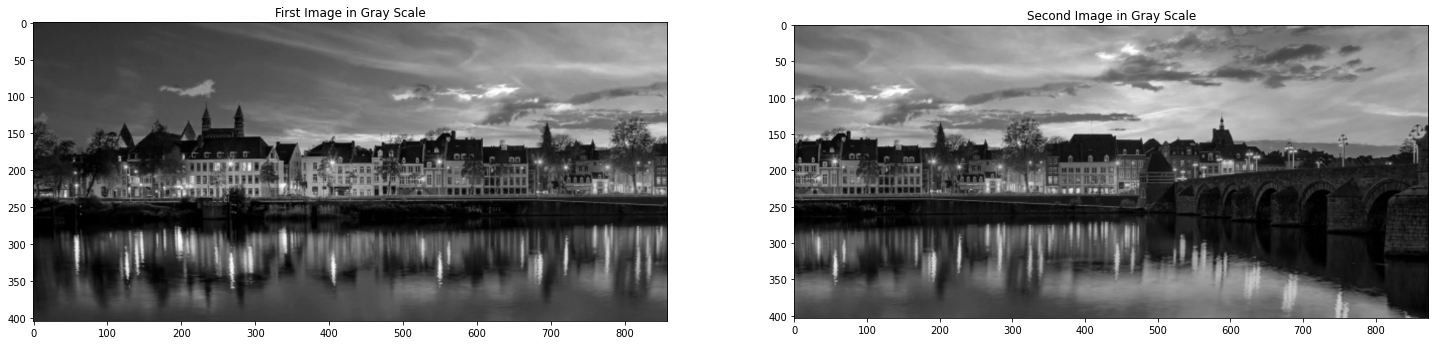

In [851]:
plt.figure(figsize = (25,8))
plt.subplot(1,2,1)
plt.imshow(firstgray,cmap='gray')
plt.title('First Image in Gray Scale')
plt.subplot(1,2,2)
plt.imshow(secondgray,cmap='gray')
plt.title('Second Image in Gray Scale')


In [852]:
firstgrayimage = np.float32(firstgray)
secondgrayimage = np.float32(secondgray)

##### **Harris corner detection on the two images**

In [853]:
firstcornerimage = cv2.cornerHarris(src=firstgrayimage, blockSize=3, ksize=3, k=0.04)
firstcornerimage = cv2.dilate(firstcornerimage,None)
# Displaying all corners above a threshold of 0.04
firstimage[firstcornerimage > 0.01 * firstcornerimage.max()] = [255,255,255] # RGB

secondcornerimage = cv2.cornerHarris(src=secondgrayimage, blockSize=3, ksize=3, k=0.04)
secondcornerimage = cv2.dilate(secondcornerimage,None)
# Displaying all corners above a threshold of 0.04
secondimage[secondcornerimage > 0.01 * secondcornerimage.max()] = [255,255,255] # RGB

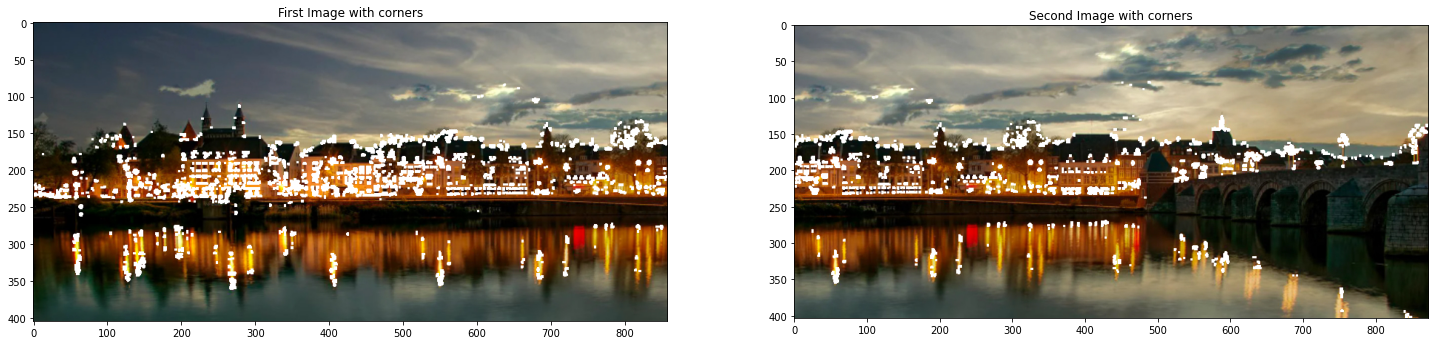

In [854]:
plt.figure(figsize = (25,8))
plt.subplot(1,2,1)
plt.imshow(firstimage)
# plt.axis('off')
plt.title('First Image with corners')
plt.subplot(1,2,2)
plt.imshow(secondimage)
# plt.axis('off')
plt.title('Second Image with corners')
plt.show()

##### **Detecting corners using second approach by SIFT and describing corners using 128 features of SIFT for each corner**

In [855]:
# !pip install opencv-python==4.5.5.64
# !pip install opencv-contrib-python==4.5.5.64

In [856]:
#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(firstgray,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(secondgray,None)

print(len(keypoints_1),len(descriptors_1), len(keypoints_2), len(descriptors_2))

2052 2052 1748 1748


##### Tried an Alternate way to calculate the euclidean distances on my own instead of the BF matcher function to calculate the closes matches of features from first image to second image

In [858]:
# mymatches=[]
# #Trying using numpy arrays..numpy did it in 40 secs! pandas dfs earlier took approx 4 hours!
# for keypoint in range(descriptors_1.shape[0]):
#   # ownsum=0
#   # for i in range(128):
#     # ownsum=np.sum(descriptors_1[keypoint])
#   mindist=[-1,999999]#,999999,ownsum]
#   sum=None
#   closestpoint=None
#   for closestpoint in range(descriptors_2.shape[0]):
#     sum=np.sqrt(np.sum(np.square(descriptors_1[keypoint]-descriptors_2[closestpoint])))
#     # totsum=np.sum(descriptors_2[closestpoint])
#     if sum<mindist[1]:
#       mindist[0]=closestpoint
#       mindist[1]=sum
#       # mindist[2]=totsum
#   mymatches.append([mindist[1],keypoint,mindist[0],0,keypoints_1[keypoint],keypoints_2[mindist[0]]])#,mindist[2]+mindist[3]])
# sortedmatches=sorted(mymatches,key=lambda l:l[0])
# # sortedmatches=sortedmatches[0]
# filteredmatches = list(filter(lambda dist: dist[0] <= 25,sortedmatches))
# # print(filteredmatches)
# #To Display and understand the data, using pandas dataframes
# dfmatches=pd.DataFrame(filteredmatches)
# dfmatches.columns=['distance','trainIdx','queryIdx','imgIdx','keypointleft','matchingkeypointright']
# # dffilter=dfmatches.loc[dfmatches['distance']<=100]
# display(dfmatches)
# # dffilter.shape

##### **Calculating Match distance between features of first image to second image using inbuilt BF Matcher function**

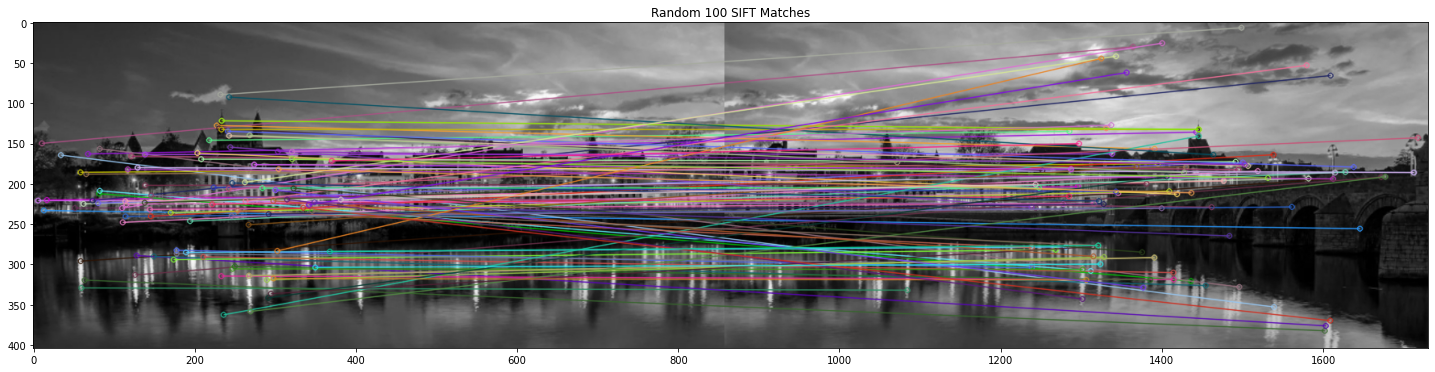

Total matches - L to R:  943
Total matches - R to L:  943
To be noted that the number of matches are equal in both the directions hence now checking and comparing distance of closest points!
[0.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0]
[0.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0

In [862]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches_firsttosecond = bf.match(descriptors_1,descriptors_2)
#NOT SORTING IMAGES SINCE RANSAC WILL ANYWAY REMOVE OUTLIERS EFFECTIVELY
# matches_firsttosecond = sorted(matches_firsttosecond, key = lambda x:x.distance)
matches_secondtofirst = bf.match(descriptors_1,descriptors_2)
#NOT SORTING IMAGES SINCE RANSAC WILL ANYWAY REMOVE OUTLIERS EFFECTIVELY
# matches_secondtofirst = sorted(matches_secondtofirst, key = lambda x:x.distance)
num_of_matches_to_show = 100
correspondence1 = cv2.drawMatches(firstgray, keypoints_1, secondgray, keypoints_2, matches_firsttosecond[:num_of_matches_to_show], secondgray, flags=2)
plt.figure(figsize=(25,8))
plt.imshow(correspondence1)
plt.title("Random "+str(num_of_matches_to_show)+" SIFT Matches")
plt.show()
print("Total matches - L to R: ",len(matches_firsttosecond))
print("Total matches - R to L: ",len(matches_secondtofirst))
print("To be noted that the number of matches are equal in both the directions hence now checking and comparing distance of closest points!")
temp1=sorted(matches_firsttosecond, key = lambda x:x.distance)[:num_of_matches_to_show]
temp2=sorted(matches_secondtofirst, key = lambda x:x.distance)[:num_of_matches_to_show]
print([match.distance for match in temp1])
print([match.distance for match in temp2])
print("Since the distance of first 100 points is all but same,\nwe can conclude that distance metric of BFMatcher function is commutative and hence \ncorrespondence is same from first to second image aqs that from second to first image")

In [863]:
firstimageindexes = []
secondimageindexes = []
print('NOTE: I have purposely not sorted matches by their distance since RANSAC is robust against outliers..\nSo just filtering top 90% matches to be feeded to RANSAC')
for i in range(int(len(matches_firsttosecond)*0.75)):
    firstimageindexes.append(matches_firsttosecond[i].queryIdx)
    secondimageindexes.append(matches_firsttosecond[i].trainIdx)
first_image_best_points = [keypoints_1[point].pt for point in firstimageindexes]
second_image_best_points = [keypoints_2[point].pt for point in secondimageindexes]

print("\nFirst Image Best Points x-y coordinates: ",first_image_best_points)
print("Corresponding Second Image Best Points x-y coordinates: ",second_image_best_points)
print("\nHere queryIdx is the descriptor index of first argument i.e. descriptor_1 or left image descriptors in my case.. and trainIdx is the descriptor index of the second argument \ni.e. descriptor_2 or right image in my case..")

NOTE: I have purposely not sorted matches by their distance since RANSAC is robust against outliers..
So just filtering top 90% matches to be feeded to RANSAC

First Image Best Points x-y coordinates:  [(5.872518539428711, 220.73880004882812), (10.564229965209961, 149.96307373046875), (13.079415321350098, 233.10023498535156), (16.782833099365234, 220.0332489013672), (34.13029098510742, 164.46405029296875), (51.6541633605957, 229.98802185058594), (58.47050857543945, 185.7814483642578), (58.70400619506836, 295.8658447265625), (59.54412841796875, 329.0877990722656), (62.15748596191406, 224.85325622558594), (63.545814514160156, 319.36737060546875), (65.53810119628906, 188.0813446044922), (67.88513946533203, 163.02859497070312), (73.4366455078125, 220.8170623779297), (80.40486145019531, 224.00848388671875), (81.5406265258789, 212.1985321044922), (82.38228607177734, 156.59413146972656), (82.4107437133789, 208.6621551513672), (109.9783935546875, 230.09893798828125), (110.85771179199219, 247.8

In [864]:
u = [point[0] for point in first_image_best_points]
v = [point[1] for point in first_image_best_points]
x = [point[0] for point in second_image_best_points]
y = [point[1] for point in second_image_best_points]

707 707 707 707


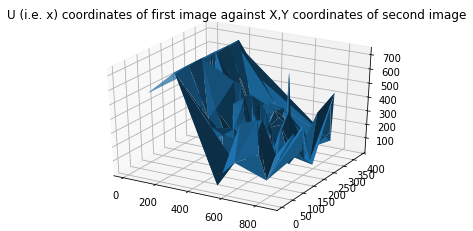

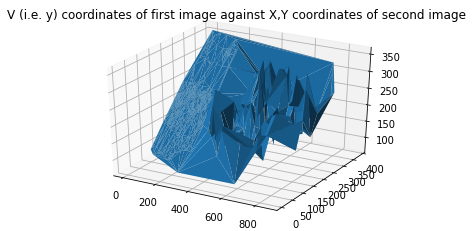

In [865]:
print(len(x),len(y),len(u),len(v))
fig1 = plt.figure()
# fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = fig1.gca(projection='3d')
ax1.plot_trisurf(x, y, u, linewidth=0.1, antialiased=True)
ax1.set_title('U (i.e. x) coordinates of first image against X,Y coordinates of second image')
plt.show()
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.plot_trisurf(x, y, v, linewidth=0.2, antialiased=True)
ax2.set_title('V (i.e. y) coordinates of first image against X,Y coordinates of second image')
plt.show()
pd.DataFrame({'x':x,'y':y,'u':u,'v':v},columns=['x','y','u','v']).to_csv('data.csv',header=True,index=False)

##### **RANSAC IMPLEMENTATION** - Defining two separate line fits - One for finding equation of x,y coordinates of corners in second image to x coordinates in first image and Second for finding the equation of x,y coordinates of corners in second image to y coordinates in first image

In [867]:
import numpy as np
class LinearLeastSquare:
    def fit(self, A, DepVar):
        A_transpose = A.transpose()
        # print("A:",np.shape(A))
        # print("A Transpose:",np.shape(A_transpose))
        ATdotA = A_transpose.dot(A)
        # print("A Transpose A:",np.shape(ATA))
        # print("Inv of A Transpose A:",np.shape(np.linalg.inv(ATA)))
        ATdotY = A_transpose.dot(DepVar)
        leastsquaremodel = (np.linalg.inv(ATdotA)).dot(ATdotY) ## For a linear eq. AP = U or AQ = V to solve a least sqaure problem,
        #P = (inverse(A'A))(A'U) or Q = (inverse(A'A))(A'V)
        return leastsquaremodel

class Ransac:   
    def __init__(self, model):
        self.model = model
    
    def fit(self, A, DepVar, sample_size, outlier_threshold):
        N = 1000000 #defining Maximum Iterations a very high value which will later be replaced by the formula of RANSAC for computing Max iterations
        iterations_done = 0
        sample_size = 3
        max_inlier_count = 0
        best_model = None
        #Assuming that the prevalence of outliers is not know earlier and hence taking an unbiased random value of 50% probability initially
        prob_outlier = 0.5
        #we want 90% chance of a clean sample  i.e. 99 clean sampls in 100 samples so defining desired probability as 0.90
        desired_prob = 0.9
        #stacking left side matrix A with right side first image x coordinates U or Y coordinates V
        total_data = np.column_stack((A, DepVar))  ## [ A | U or V]
        total_datapoints = len(total_data)
        # Adaptively determining the number of iterations
        while iterations_done < N:
            # shuffle the rows and take the first 'num_sample' rows as sample data
            np.random.shuffle(total_data)
            sample_data = total_data[:sample_size, :]
            
            estimated_model = self.model.fit(sample_data[:,:-1], sample_data[:, -1:]) ## [a b c] or [d e f]

            # count the inliers within the threshold
            estimated_coordinates = A.dot(estimated_model)
            # err = np.abs(DepVar - estimated_coordinates.T)
            points_distance = np.sqrt(np.square(DepVar - estimated_coordinates.T))
            inlier_count = np.count_nonzero(points_distance < outlier_threshold)
            # changing the best fitting model observed so far if it has more inliers
            if inlier_count > max_inlier_count:
                max_inlier_count = inlier_count
                best_model = estimated_model
            #Modifying the newly observed probability of Outlier and hence modifying Number of iterations for Drawing atleast one clean sample
            prob_outlier = 1 - inlier_count/total_datapoints
            print('# inliers:', inlier_count)
            print('# prob_outlier:', prob_outlier)
            N = math.log(1 - desired_prob)/math.log(1 - 0.99999*(1 - prob_outlier)**sample_size)
            iterations_done = iterations_done + 1

            print('# Iterations Done -> N:', iterations_done)
            print('# Max Iterations Required for desired probability of Clean Sample -> Nmax:', N)
            print('# Current Inliers in best model: ', max_inlier_count)
            print("# Current BEST MODEL:\n",best_model)
        return best_model

import math
import pandas as pd
from matplotlib import pyplot as plt
def findTransformation(data):
    x_values = np.array(data['x'])
    y_values = np.array(data['y'])
    DepVar_values = np.array(data['dependent'])
    """
    Based on the data the equation that is required is: aX + bY + c = U
    and dX + eY + f = V
    So, we need to define matrices:
     1. A with columns [X  Y  1]
     2. P = [a b c]*   (* = transpose)
     3. Q = [d e f]* (* = transpose)
     4. U
     5. V
    So that we will be finding the solution for the equation AP = U and AQ = V
    We can then combine the A B C and D E F found by the Ransac algorithm as the 6 parameters of our Affine Transformation Matrix.
    """
    ## A = [x  y  1]
    A = np.stack((x_values, y_values, np.ones((len(x_values)), dtype = int)), axis = 1)
    outlier_threshold = np.std(DepVar_values)/3  # this can be tuned to /3 or /5 for various thresholds and better consistent results as a result of random sampling
    # Instantiating the linear least sqaure model
    linear_ls_model = LinearLeastSquare()
    linear_ls_model_estimate = linear_ls_model.fit(A, DepVar_values)
    linear_model = A.dot(linear_ls_model_estimate)
    # Instantiating the ransac model
    ransac_model = Ransac(linear_ls_model)
    ransac_model_estimate = ransac_model.fit(A, DepVar_values, 3, outlier_threshold)
    print("Resulting Parameters:",ransac_model_estimate)
    ransac_model = A.dot(ransac_model_estimate)
    return linear_model, ransac_model, ransac_model_estimate

# inliers: 575
# prob_outlier: 0.1867043847241867
# Iterations Done -> N: 1
# Max Iterations Required for desired probability of Clean Sample -> Nmax: 2.9823157156582143
# Current Inliers in best model:  575
# Current BEST MODEL:
 [[9.99494120e-01]
 [1.18382263e-03]
 [4.92851981e+02]]
# inliers: 58
# prob_outlier: 0.917963224893918
# Iterations Done -> N: 2
# Max Iterations Required for desired probability of Clean Sample -> Nmax: 4169.407821615773
# Current Inliers in best model:  575
# Current BEST MODEL:
 [[9.99494120e-01]
 [1.18382263e-03]
 [4.92851981e+02]]
# inliers: 81
# prob_outlier: 0.8854314002828855
# Iterations Done -> N: 3
# Max Iterations Required for desired probability of Clean Sample -> Nmax: 1530.0177310955598
# Current Inliers in best model:  575
# Current BEST MODEL:
 [[9.99494120e-01]
 [1.18382263e-03]
 [4.92851981e+02]]
# inliers: 575
# prob_outlier: 0.1867043847241867
# Iterations Done -> N: 4
# Max Iterations Required for desired probability of Clean Sample -> N

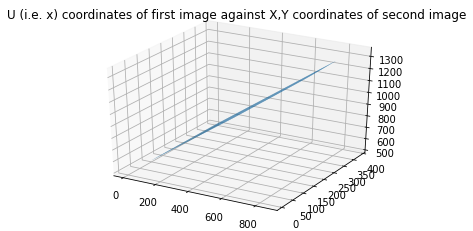

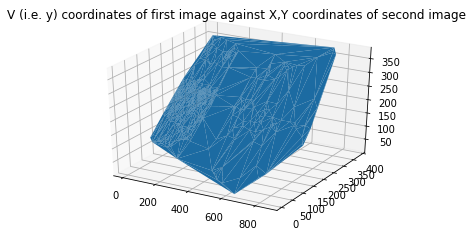

In [868]:
# First Ransac
df1 = pd.DataFrame({'x':x,'y':y,'dependent':u},columns=['x','y','dependent'])
# Second Ransac
df2 = pd.DataFrame({'x':x,'y':y,'dependent':v},columns=['x','y','dependent'])

leastsquare_model_1, ransac_model_1, ransac_params_1 = findTransformation(df1)
leastsquare_model_2, ransac_model_2, ransac_params_2 = findTransformation(df2)
#Extracting and forming affine matrix obtained from RANSAC
firstrow = ransac_params_1.reshape(1,3)[0]
secondrow = ransac_params_2.reshape(1,3)[0]
finalrow = np.array([0,0,1]) #this will be hardcoded as 0,0,1 because there is no projective transformation assumed.
M=np.stack((firstrow,secondrow,finalrow))
print(M)

# Drawing revised 3d plots based on the obtained affine transformation between two images
# Based on the data the equation that is required is: aX+bY+c=U and dX+eY+f=V
A = np.stack((x, y, np.ones((len(x)), dtype = int)), axis = 1)
U_estimated = A.dot(firstrow)
V_estimated = A.dot(secondrow)
fig1 = plt.figure()
# fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = fig1.gca(projection='3d')
ax1.plot_trisurf(x, y, U_estimated, linewidth=0.2, antialiased=True)
ax1.set_title('U (i.e. x) coordinates of first image against X,Y coordinates of second image')
plt.show()
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.plot_trisurf(x, y, V_estimated, linewidth=0.2, antialiased=True)
ax2.set_title('V (i.e. y) coordinates of first image against X,Y coordinates of second image')
plt.show()

##### Warping second image on first at appropriate boundary of stitch using obtained affine matrix

In [869]:
stitched_image = cv2.warpPerspective(secondgray,M,((firstgray.shape[1]+secondgray.shape[1]+int(M[0][2])), firstgray.shape[0]+int(M[1][2])))
stitched_image[0:firstgray.shape[0], 0:firstgray.shape[1]] = firstgray[:stitched_image.shape[0],:]

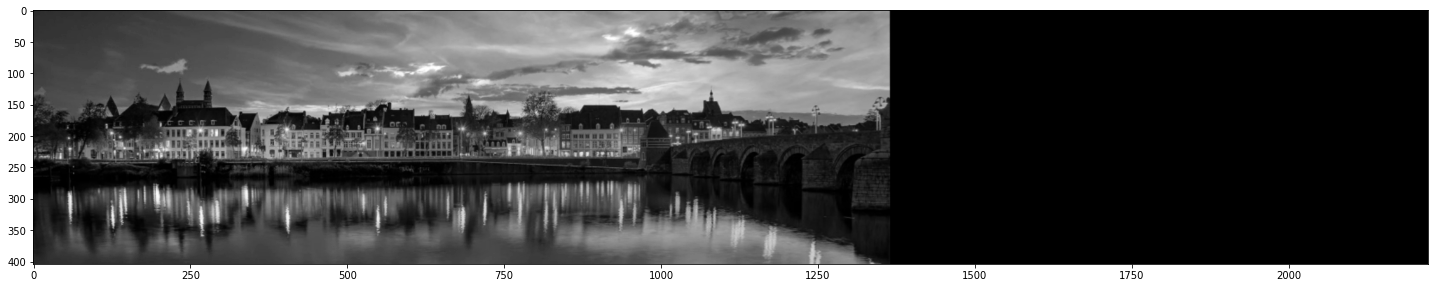

(404, 2223)

In [870]:
plt.figure(figsize=(25,20))
plt.subplot(1,1,1)
plt.imshow(stitched_image, cmap='gray')
plt.show()
stitched_image.shape

##### Removing any black regions from the resultant stitched image

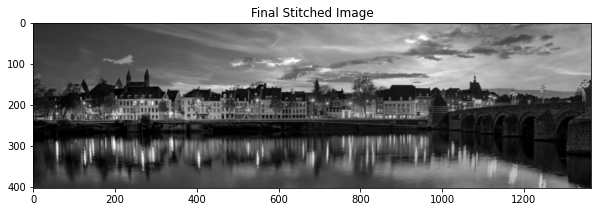

In [871]:
def black_region_remover(image):
    y_nonzero, x_nonzero = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

stitched_image = black_region_remover(stitched_image)
if stitched_image.shape[0]>50 and stitched_image.shape[1]>50:
    plt.figure(figsize=(10,30))
    plt.subplot(1,1,1)
    plt.imshow(stitched_image, cmap='gray')
    plt.title('Final Stitched Image')
    plt.show()
else:
    print(" Two Provided Images are Incompatible for Stitching")